In [1]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','notebook'])

/home/daneel/gitrepos/mdanalysis/package/MDAnalysis/lib/_distopia.py:51: RuntimeWarning: distopia version 0.3.1 is too old; need at least 0.4.0, Your installed version of distopia will NOT be used.
  warnings.warn(


## Read in the Universe

In [4]:
#Read all the trajectories
ku04amp01_folding= mda.Universe('ku04amp01_linear/sys_prod/start.pdb', 'ku04amp01_linear/sys_prod/prod_ku04amp01_linear_compact.xtc')


## RMSD Calculation

  0%|          | 0/2501 [00:00<?, ?it/s]

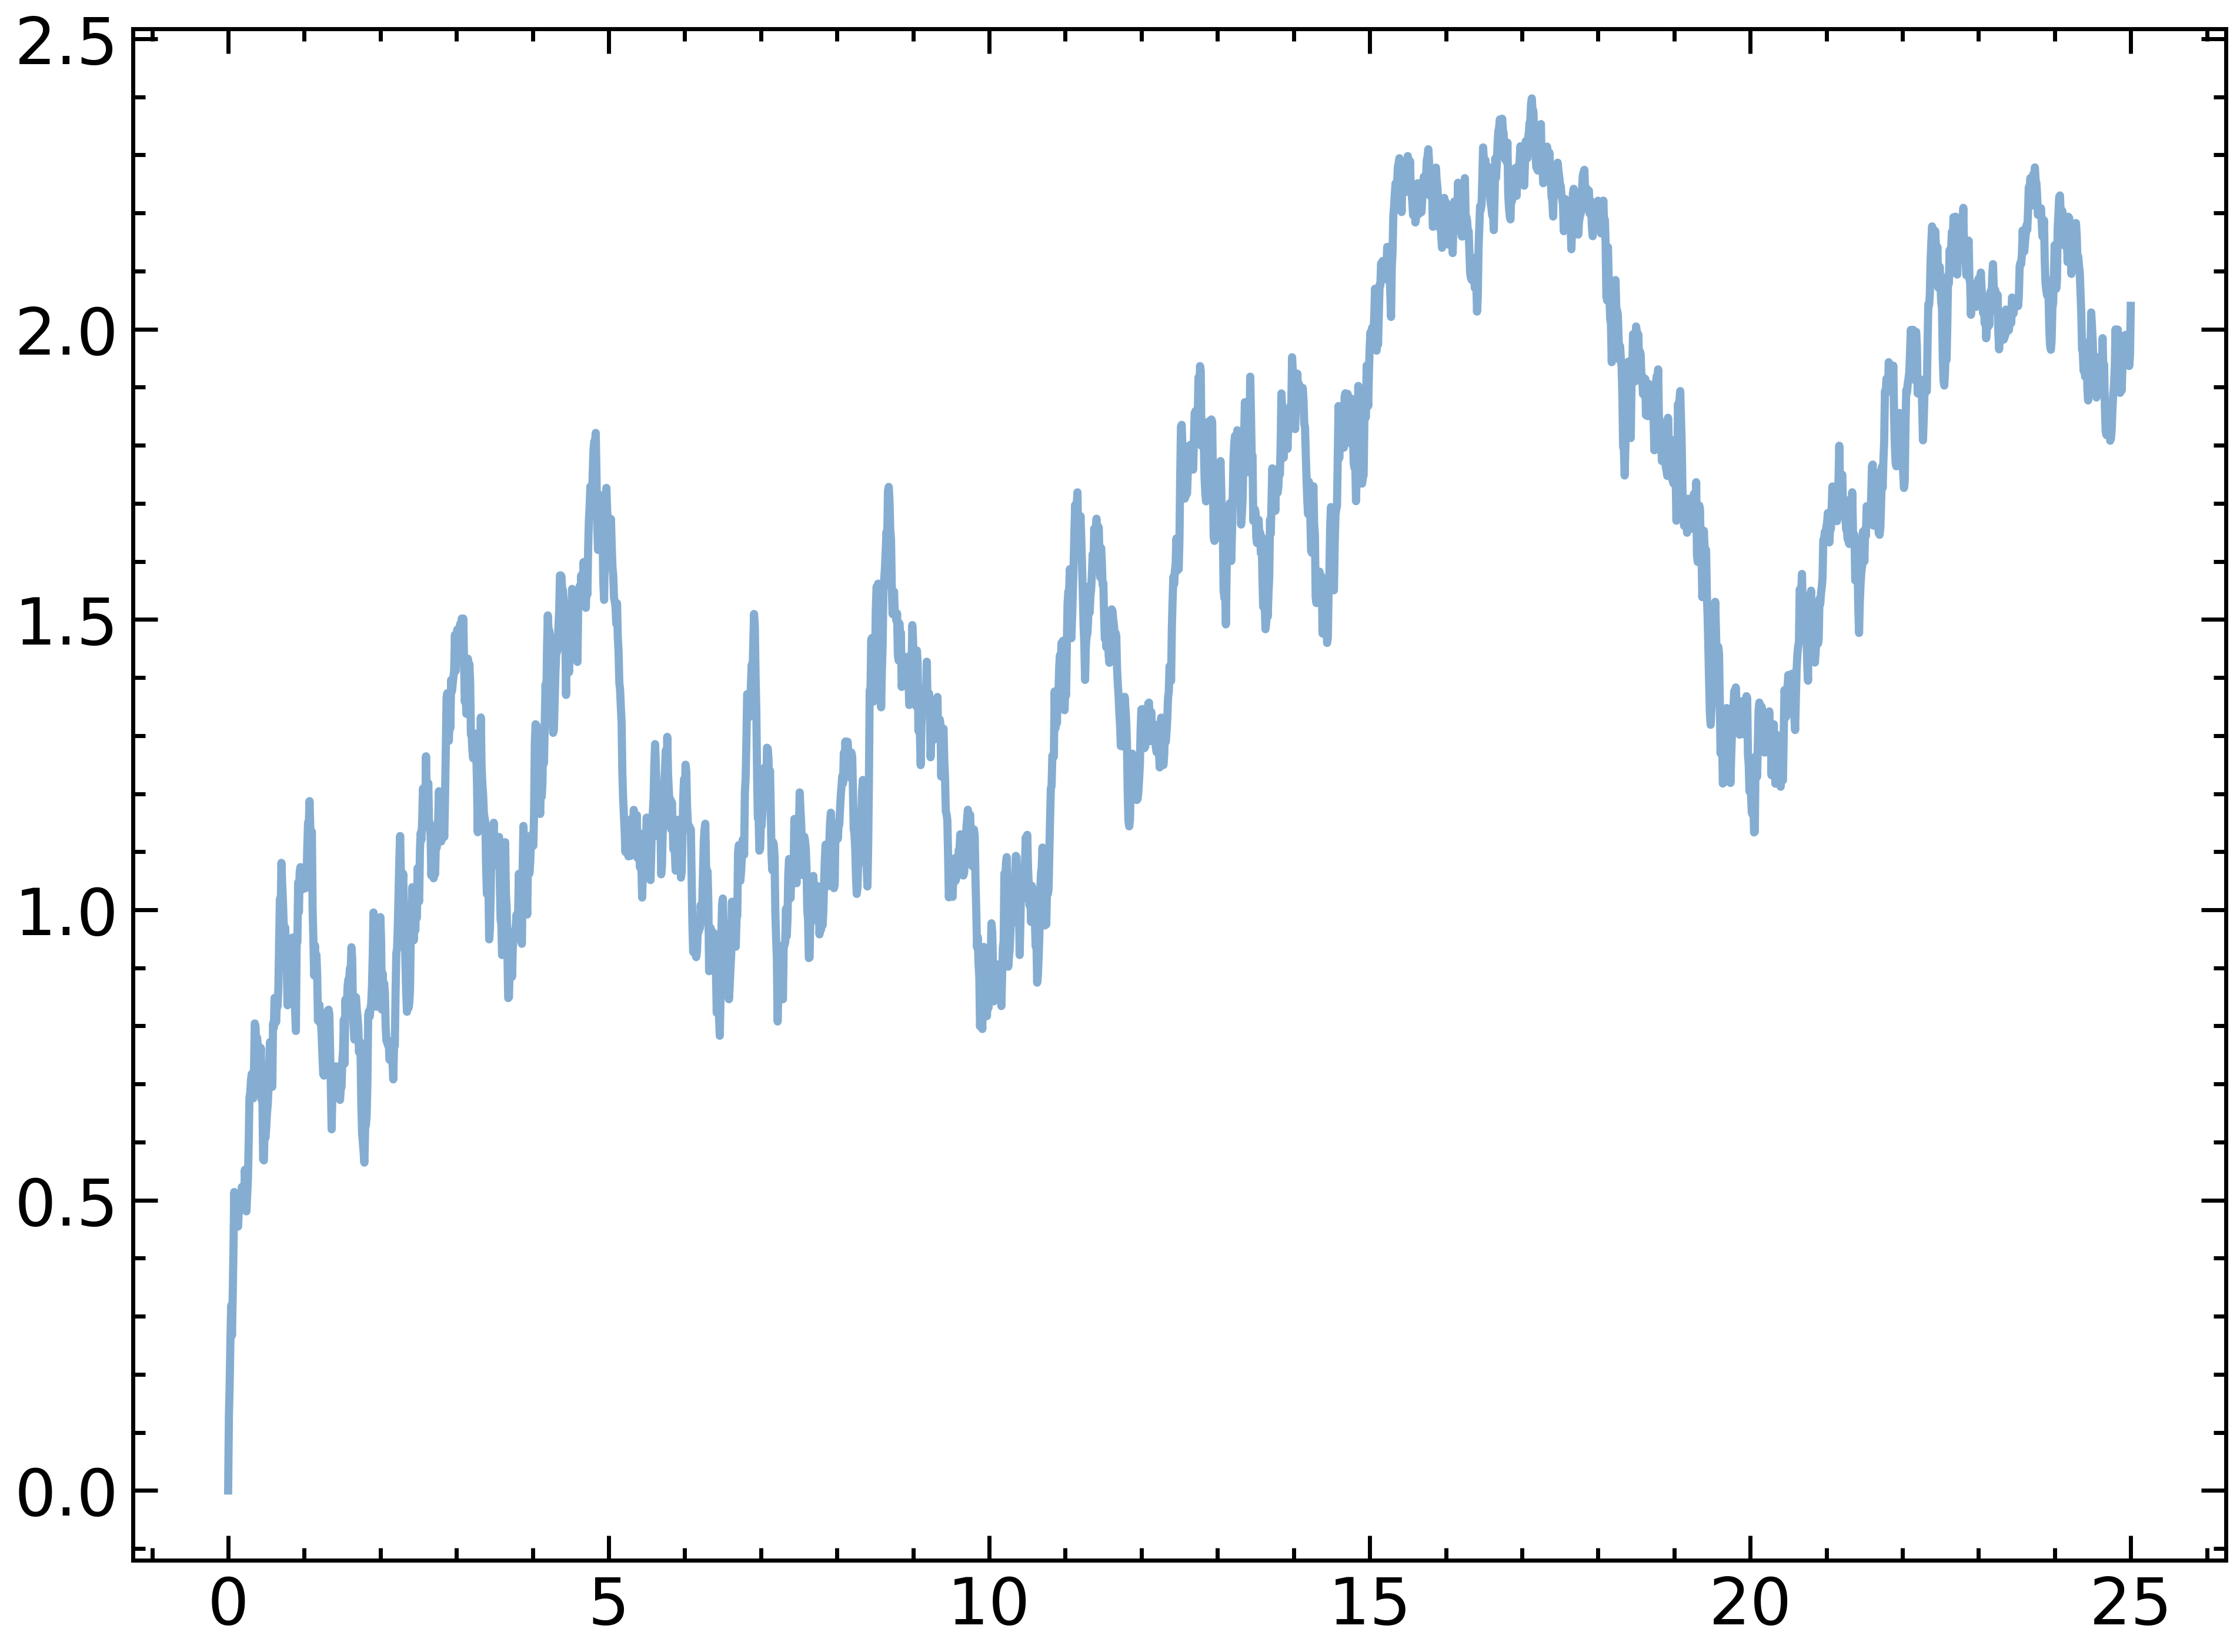

In [5]:
from MDAnalysis.analysis import rms

R = rms.RMSD(ku04amp01_folding,  # universe to align
    ku04amp01_folding,  # reference universe or atomgroup
    select='backbone',  # group to superimpose and calculate RMSD
    ref_frame=0)  # frame index of the reference

R.run(verbose=True)
times_c = R.results.rmsd[:,1]
rmsd_c = R.results.rmsd[:,2]
plt.plot(times_c/1000, rmsd_c/10, alpha=0.5)

## Radius of Gyration Calculation

  0%|          | 0/2501 [00:00<?, ?it/s]

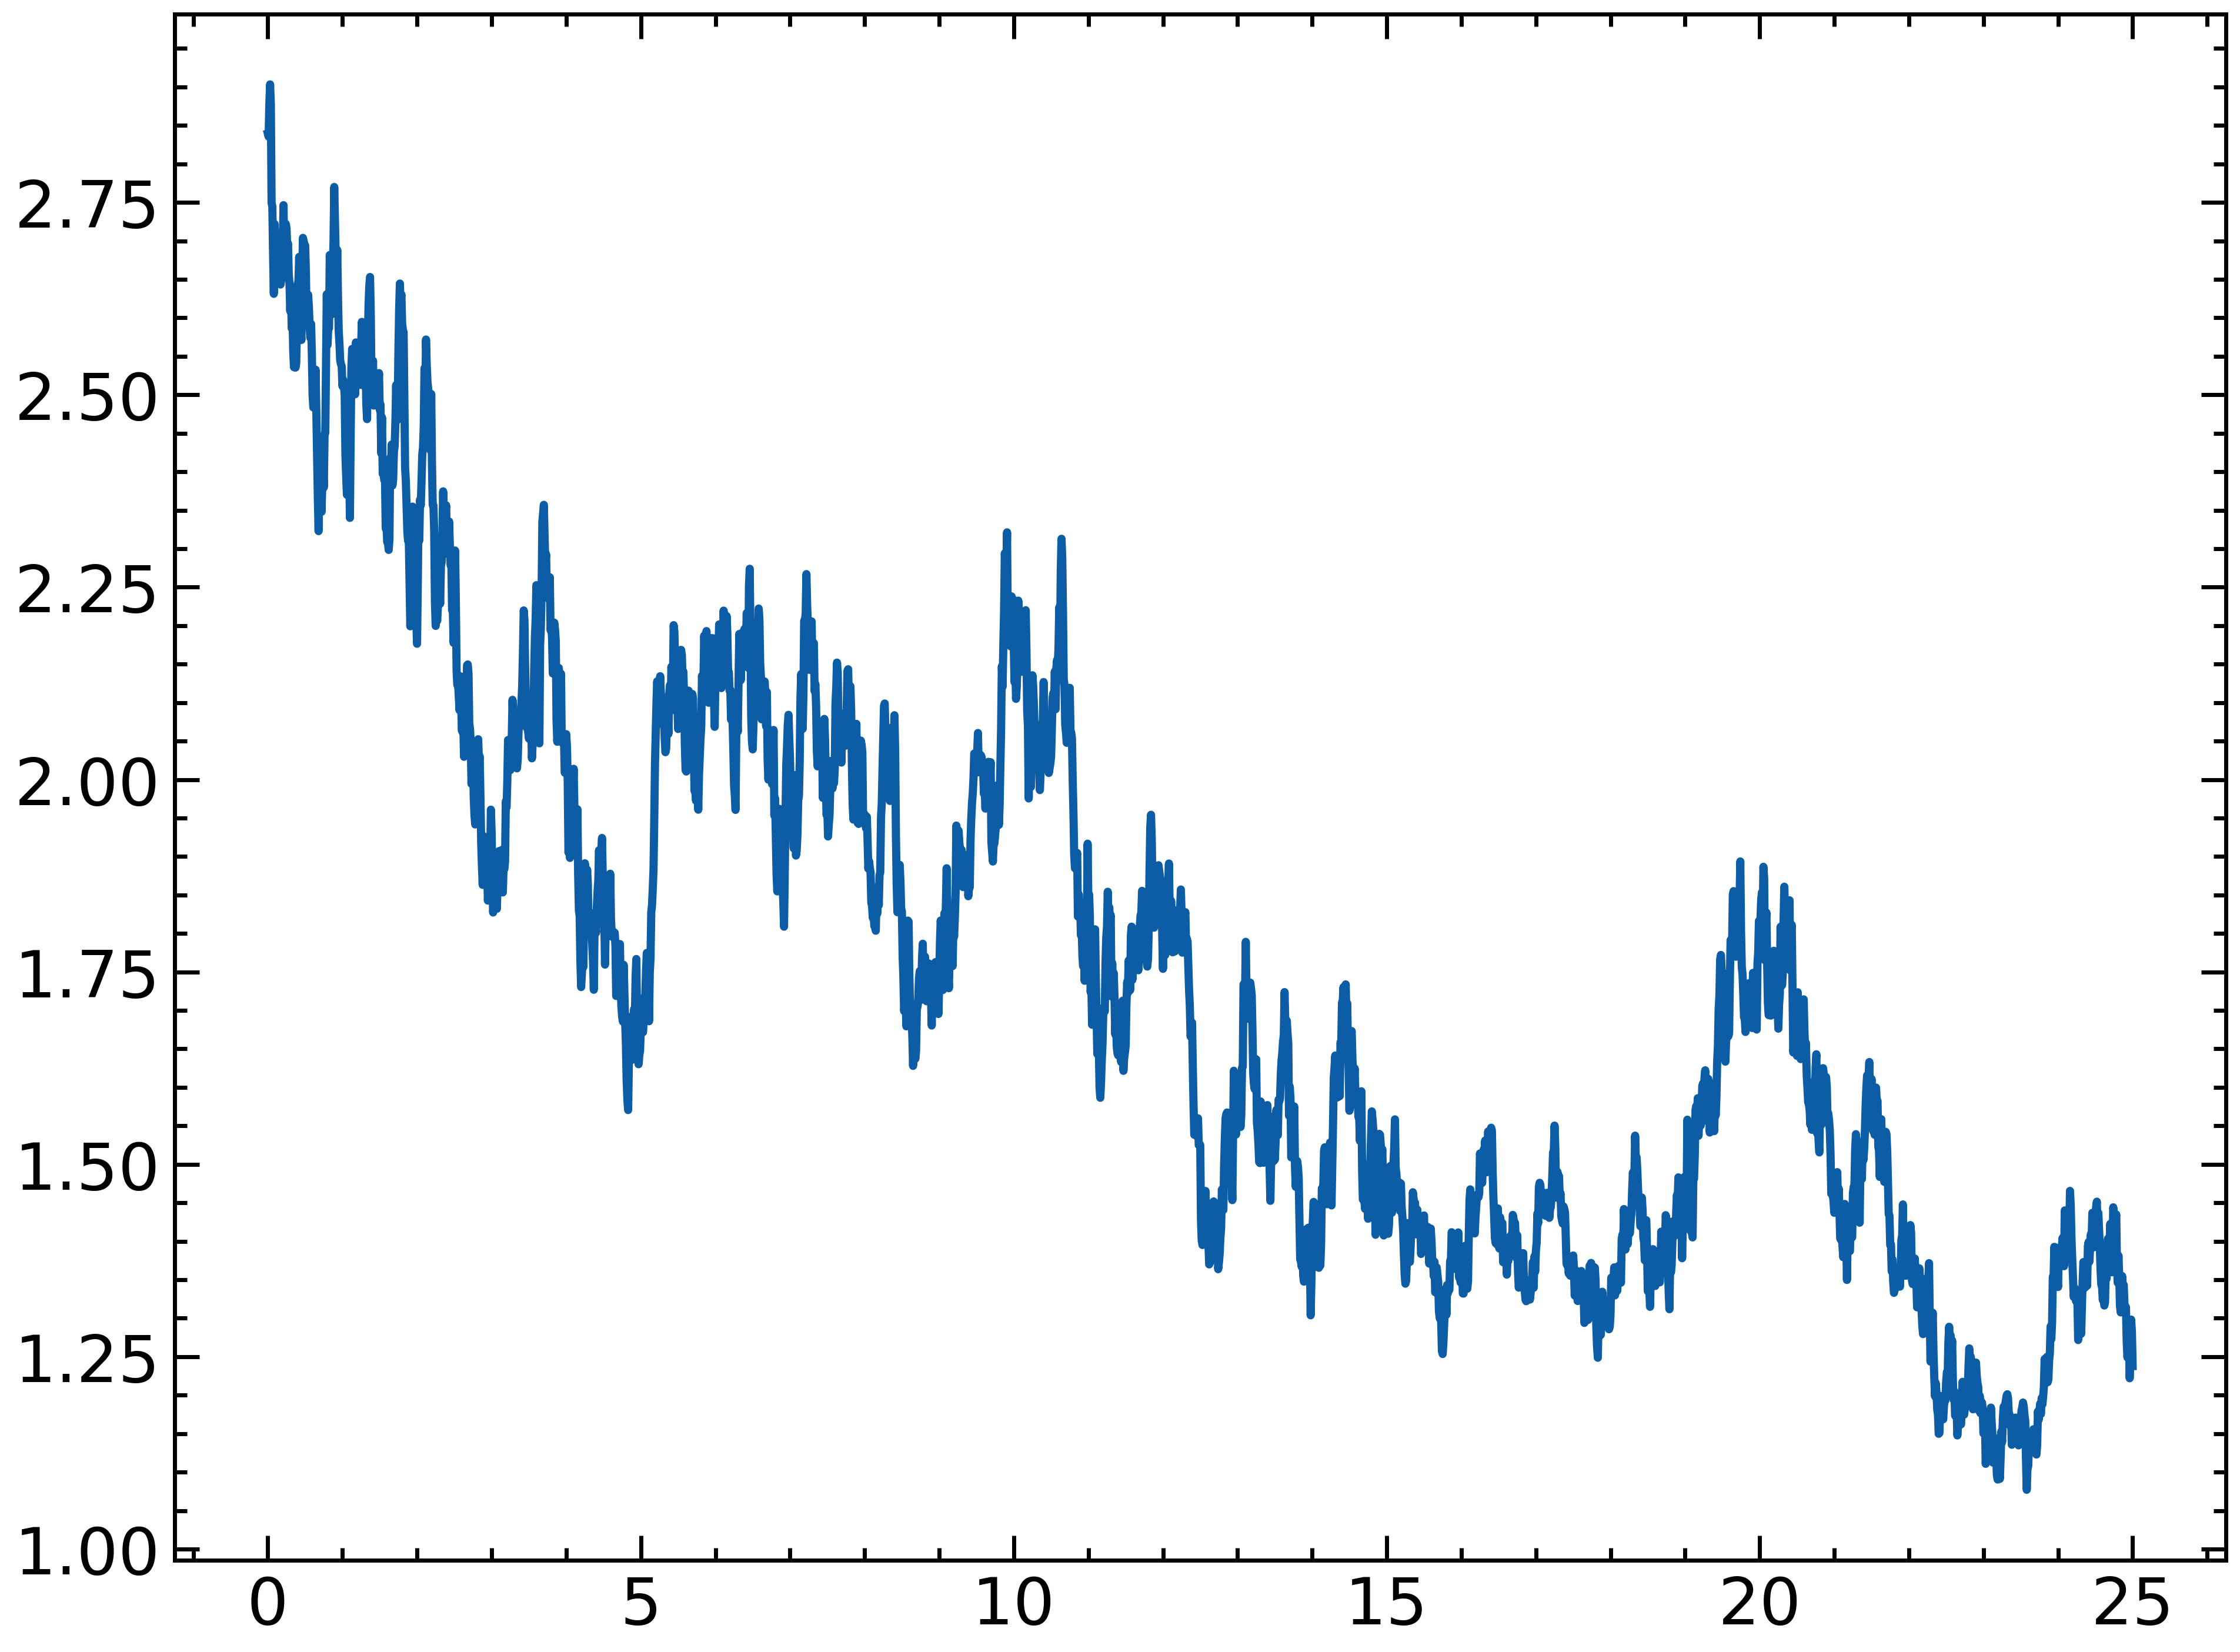

In [7]:
from tqdm.notebook import tqdm
group = ku04amp01_folding.select_atoms('protein')		# change the atom selection for your specific system

Frame = []
times = []
Rgyr = []
for ts in tqdm(ku04amp01_folding.trajectory):
	Frame.append(ts.frame)
	times.append(ku04amp01_folding.trajectory.time)
	Rgyr.append(group.radius_of_gyration())

Rgyrc_table = np.vstack((Frame, times, Rgyr)).T
plt.plot(Rgyrc_table[:,1]/1000, Rgyrc_table[:,2]/10)

## RMSF Calculation

Between protein backbone and Carbon alphas.

  0%|          | 0/2501 [00:00<?, ?it/s]

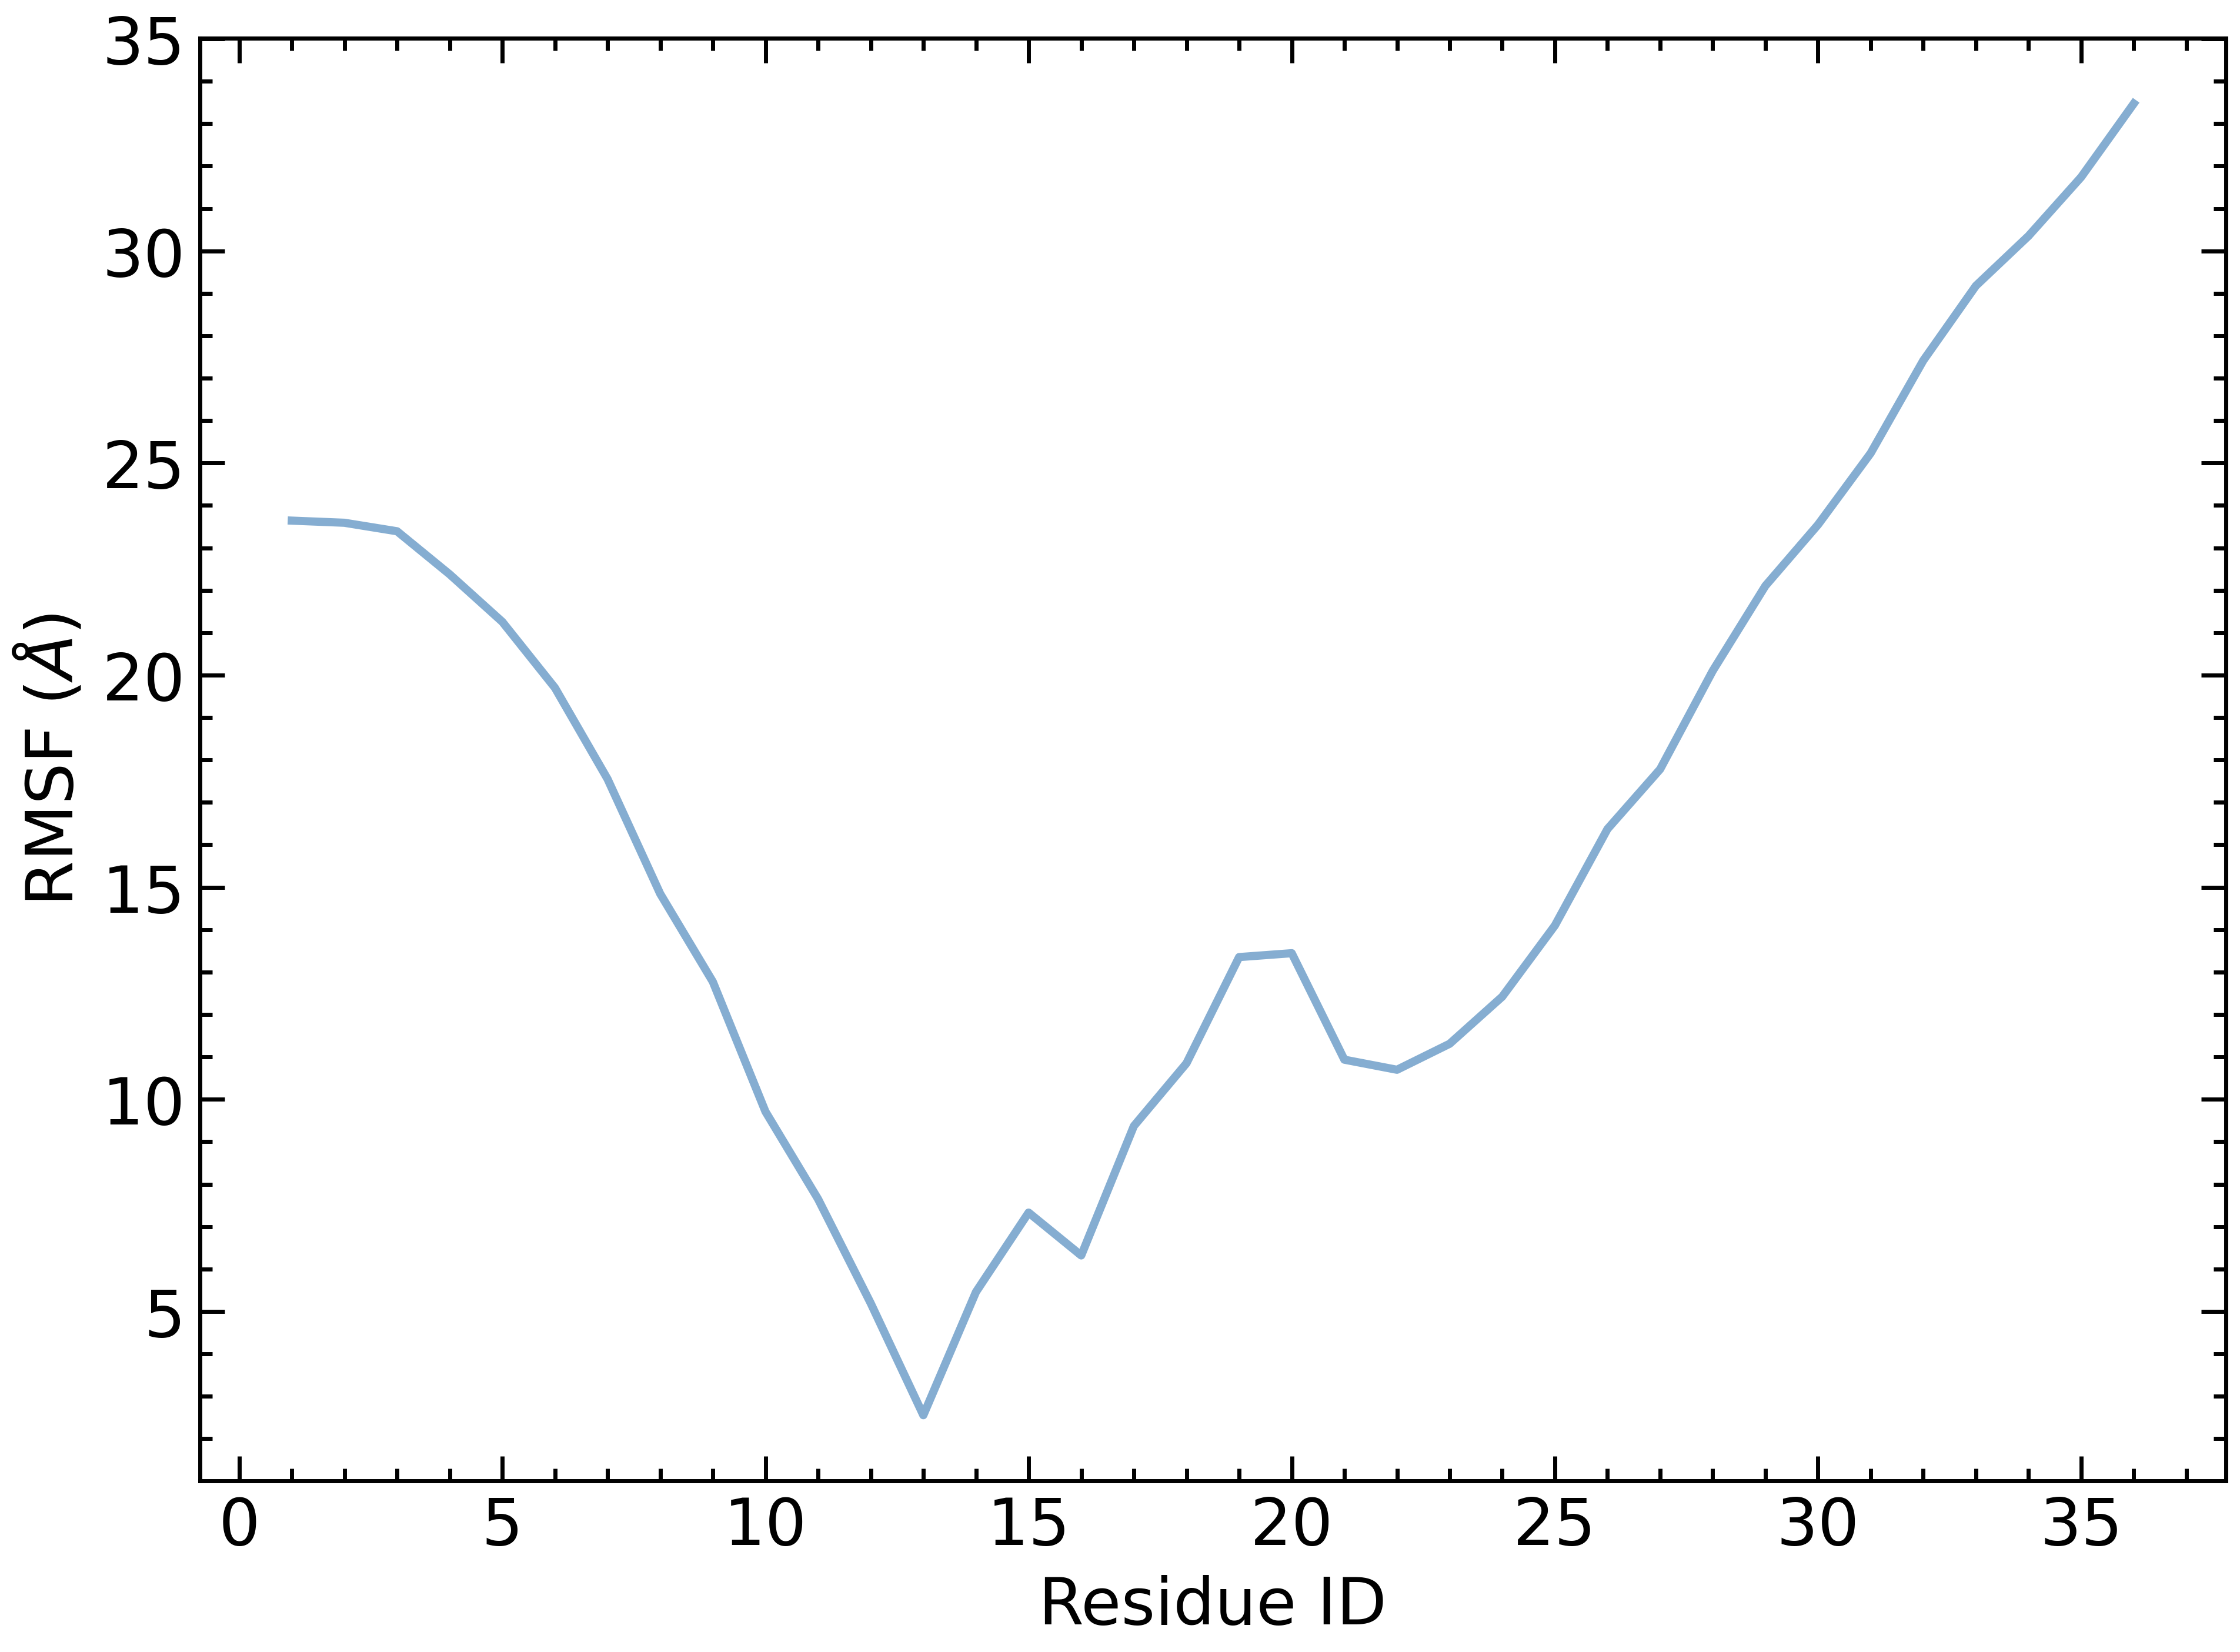

In [8]:
c_alphas_c = ku04amp01_folding.select_atoms('backbone and name CA')
R_c = rms.RMSF(c_alphas_c).run(verbose=True)
plt.xlabel('Residue ID')
plt.ylabel(r'RMSF $\left(\AA\right)$')
plt.plot(c_alphas_c.resids, R_c.results.rmsf, alpha=0.5)
plt.savefig('rmsf.png', dpi=600)

### Observations

Everything is dancing about. Residues 10-15 are relatively still.

## Plots

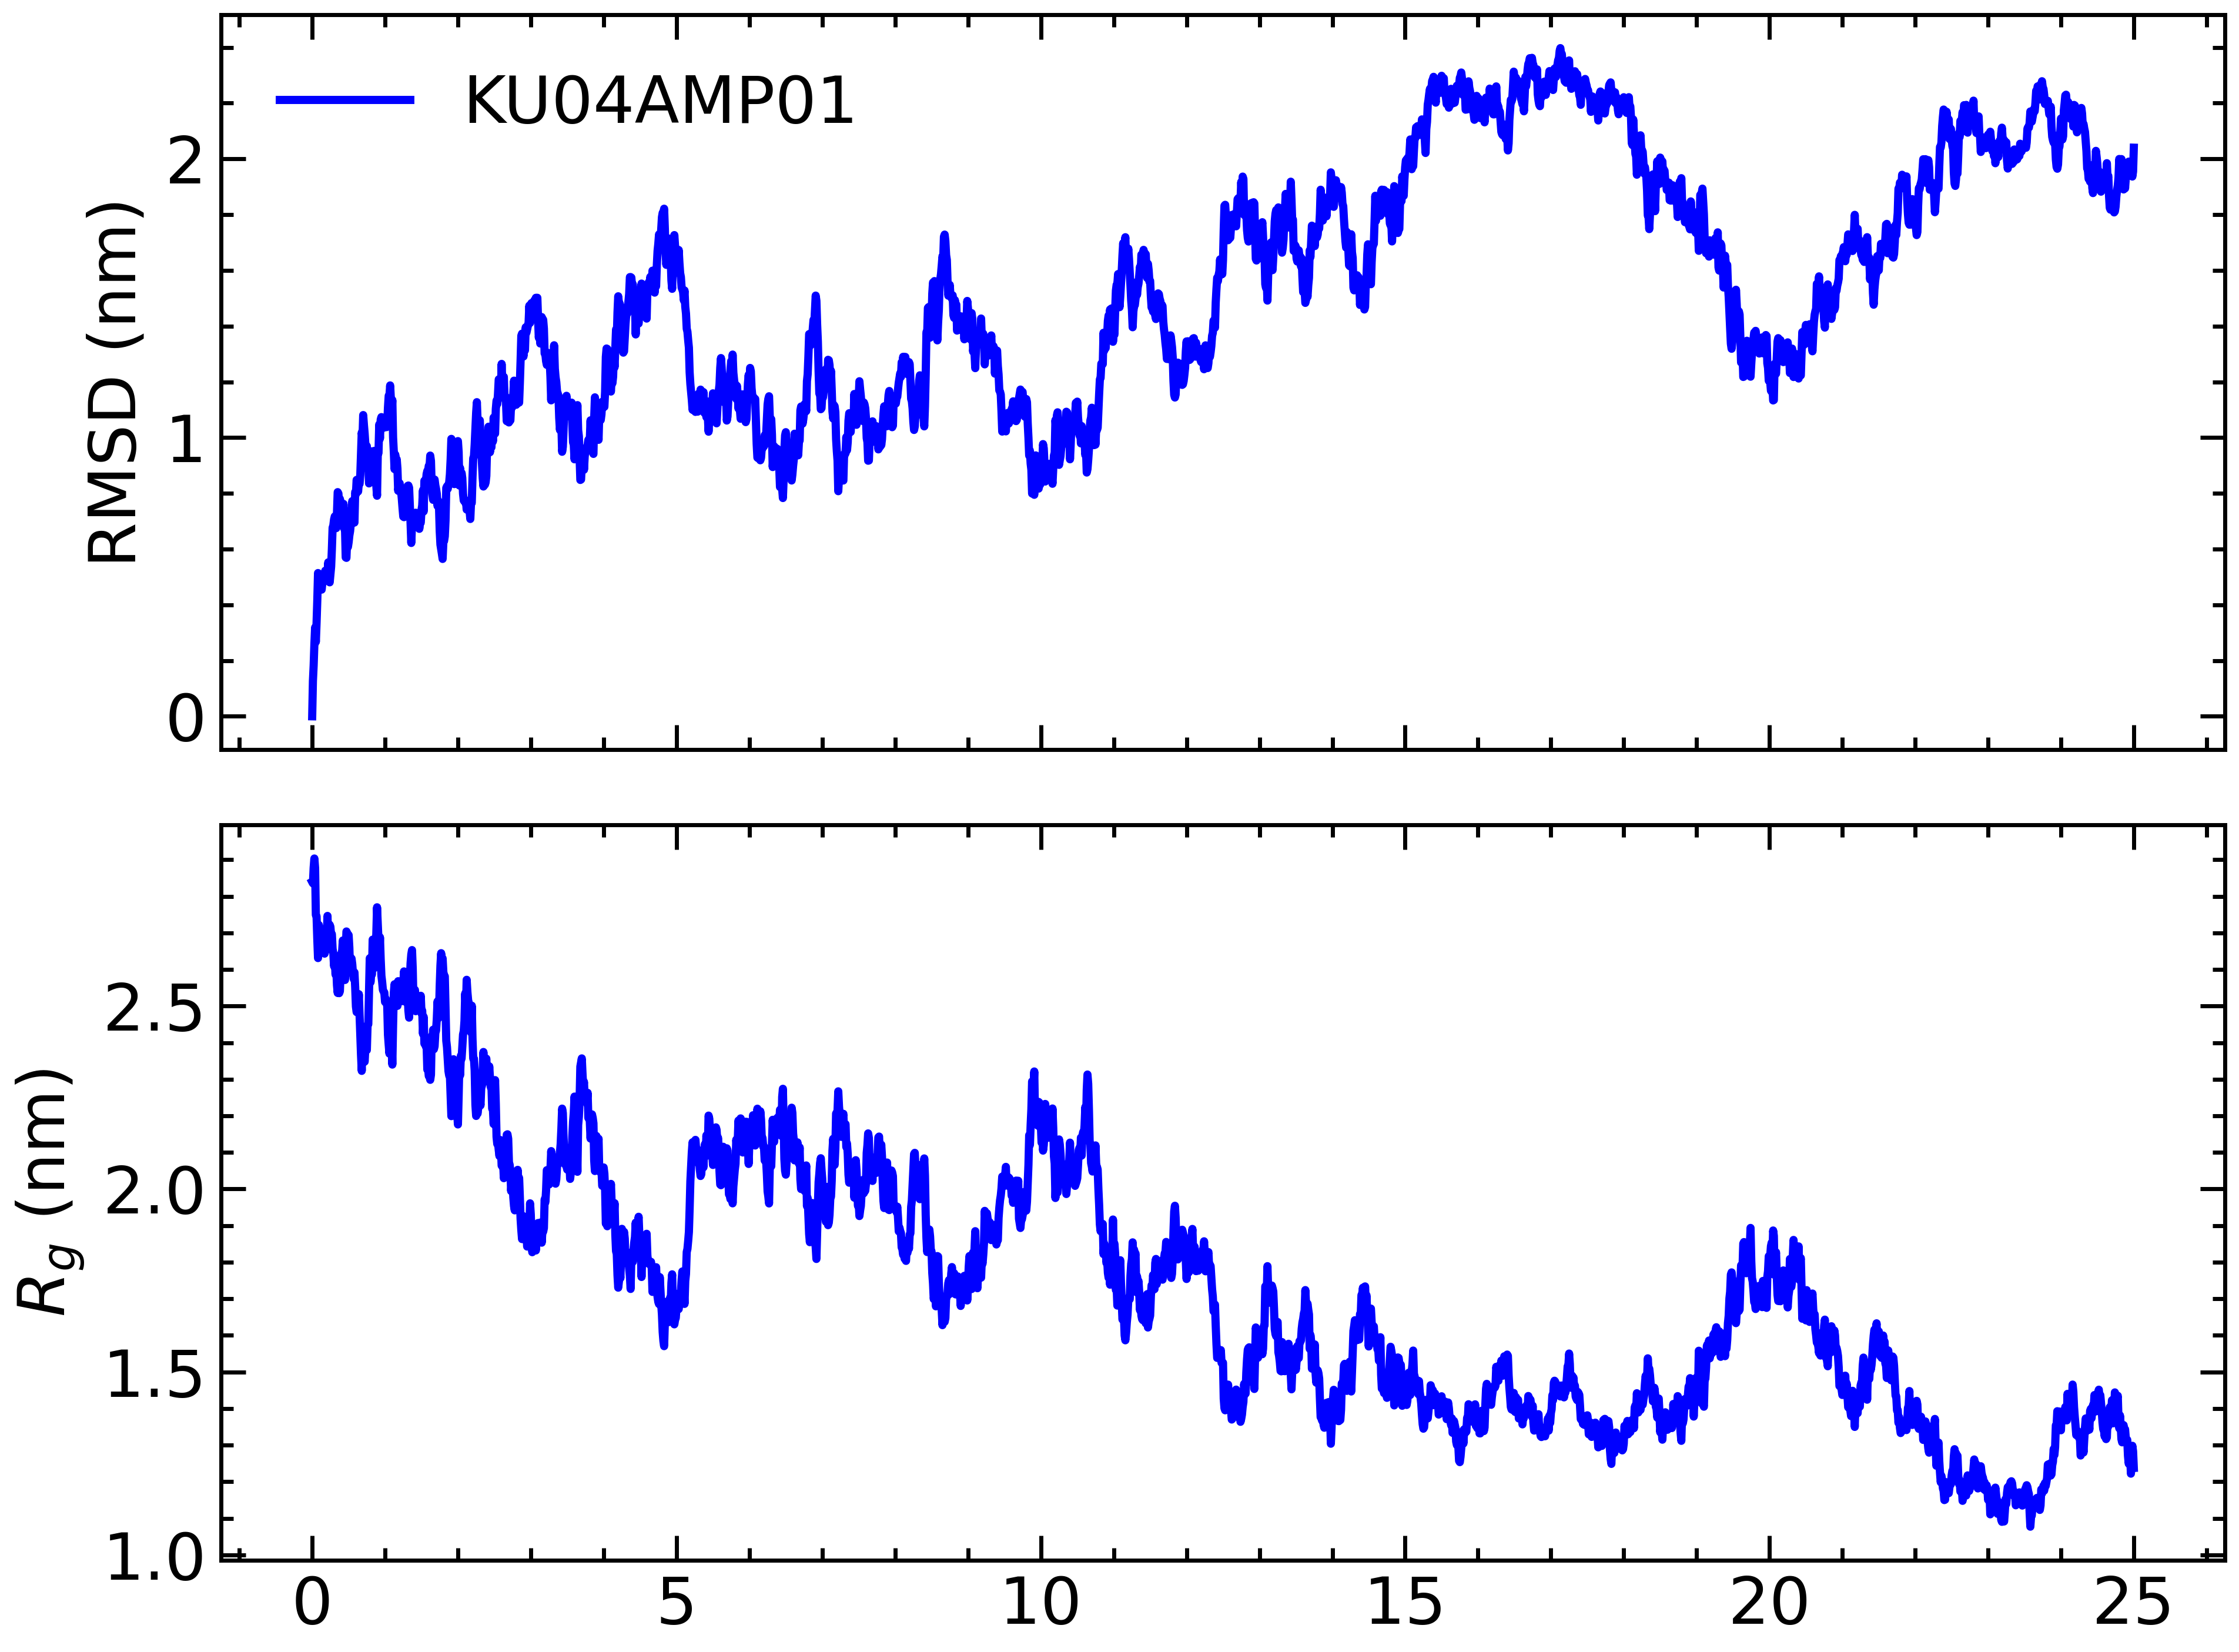

In [9]:
npanels = 2
fig, axs = plt.subplots(npanels,1, sharex=True, tight_layout=True)

ax_rmsd = axs[0]
ax_rmsd.set_ylabel(r'RMSD (nm)');


ax_rmsd.plot(times_c/1000, rmsd_c/10, label="KU04AMP01", 
        color='blue')

ax_rmsd.legend()

ax_rg = axs[1]

ax_rg.plot(Rgyrc_table[:,1]/1000, Rgyrc_table[:,2]/10, 
        label="Colpm-PEA", color='blue')
ax_rg.set_ylabel(r'$R_g$ (nm)');

plt.savefig("time-series-plots.png", dpi=600)
plt.show()

## Dihedral Angle Analysis

Ramchandran plots

In [12]:
from MDAnalysis.analysis.dihedrals import Ramachandran

residues = ku04amp01_folding.select_atoms('protein')

r = Ramachandran(residues).run()


/home/daneel/gitrepos/mdanalysis/package/MDAnalysis/analysis/dihedrals.py:444: UserWarning: Cannot determine phi and psi angles for the first or last residues
  warnings.warn(


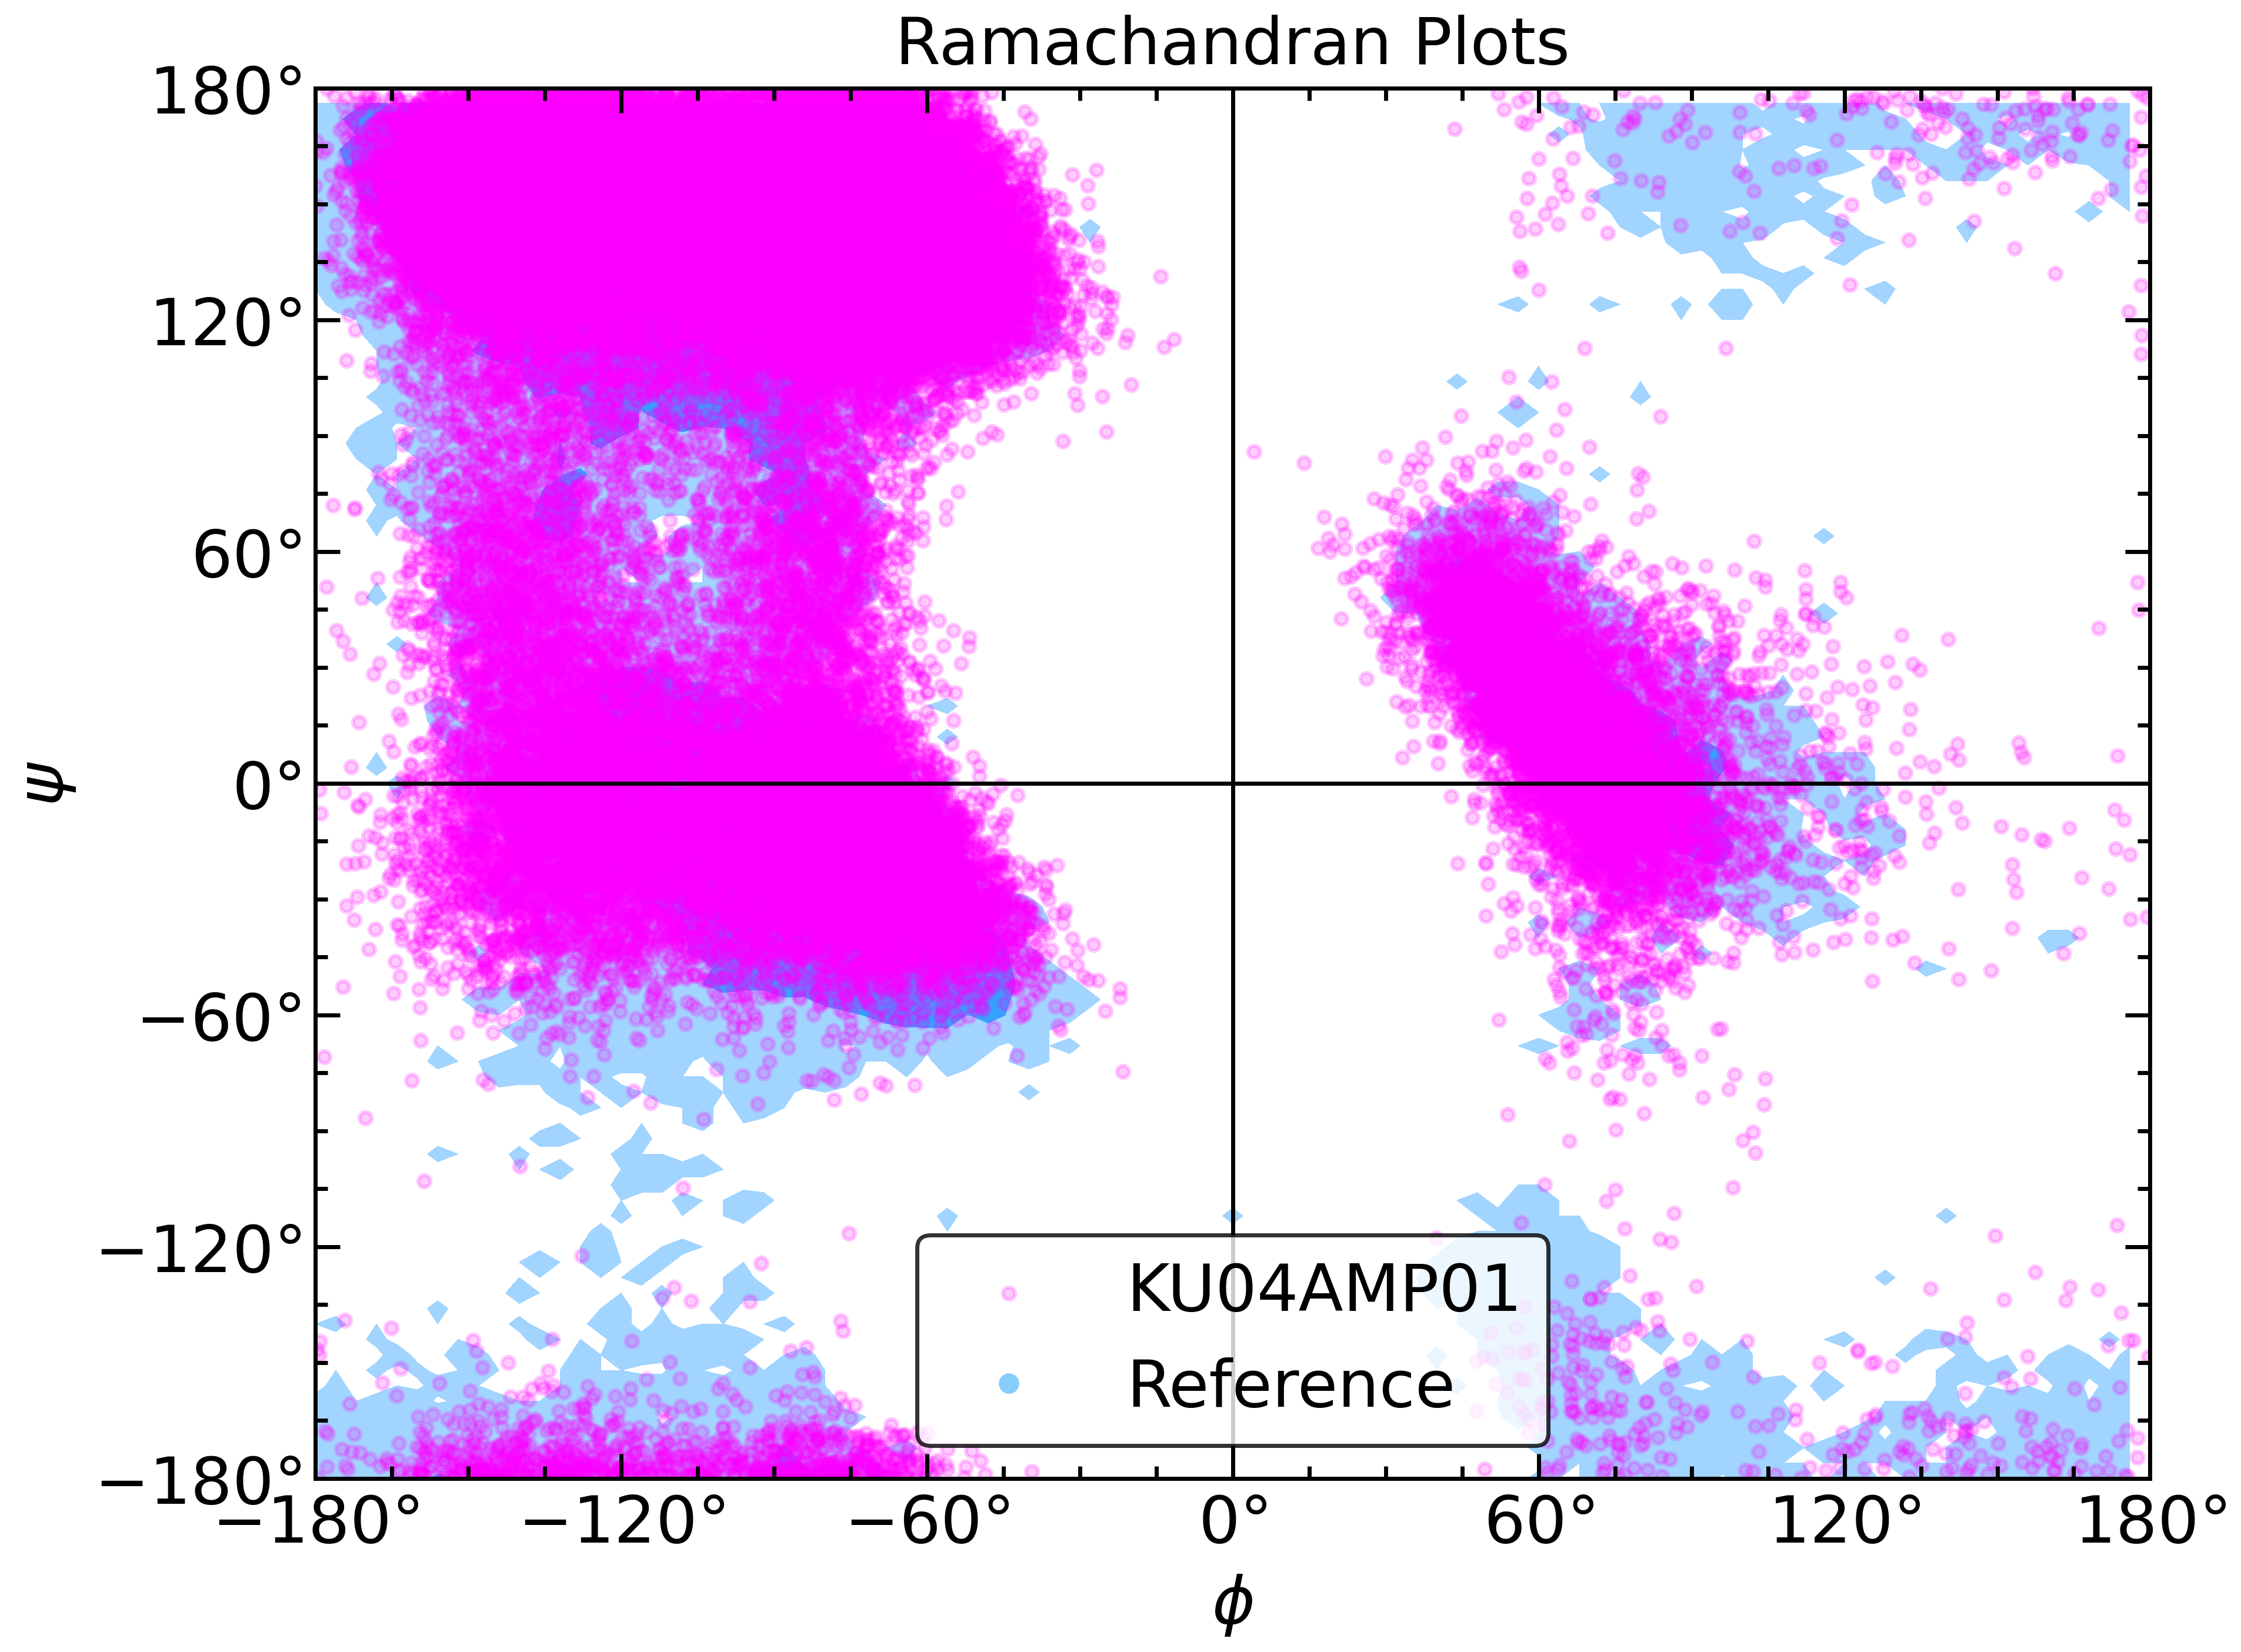

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title('Ramachandran Plots')
r.plot(ax=ax, ref=True, color='magenta', marker='.', alpha=0.2, label='KU04AMP01')
ax.plot([], [], color='lightskyblue', marker='.', linestyle='None', markersize=8, label='Reference')
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.edgecolor'] = 'black'
plt.rcParams['legend.fancybox'] = True
ax.legend()
plt.savefig('ramachandran.png', dpi=600)

Identifying random coil conformations in a protein using a Ramachandran plot can be a bit tricky, as random coils do not have well-defined dihedral angles like structured regions. However, there are some general characteristics you can look for:

Scattered Points: Random coil regions are characterized by a lack of regular structure, so their φ (phi) and ψ (psi) angles will be more dispersed and scattered across the plot, rather than clustering in specific regions.

Absence of Clusters: Unlike alpha helices and beta sheets, which form distinct clusters in the allowed regions, random coils do not form such clusters. Instead, their angles may be distributed more evenly across the plot.

Allowed Regions: While random coils can have dihedral angles that fall within the allowed regions, they do not exhibit the tight clustering seen in secondary structures. You may see points within the alpha-helical or beta-sheet regions, but they won't be as concentrated.

Flexible Regions: Random coil regions are typically associated with higher flexibility, which can be reflected in the variability of their dihedral angles. These regions may show a wide range of φ and ψ values.

Here's a quick summary of what to look for:

Random coil: Scattered points, absence of clusters, wide range of φ and ψ values.